In [43]:
import pandas as pd
import numpy as np
import os
import tqdm
from collections import defaultdict
from pandarallel import pandarallel
import requests
import json
from matplotlib import pyplot as plt
import pickle

from debtmonitor.help_function import *

tqdm.tqdm.pandas()

pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


100%|██████████| 5/5 [00:00<00:00, 58.00it/s]


dict_keys(['642,321', '642,642', '642,1284', '642,3212', '1606,321', '1606,642', '1606,1284', '1606,3212', '3212,321', '3212,642', '3212,1284', '3212,3212', '6424,321', '6424,642', '6424,1284', '6424,3212', '12848,321', '12848,642', '12848,1284', '12848,3212'])
-1.8146406243933344e-07


,var,last
0,9.818296e-07,0.000000
1,2.175808e-07,0.000000
2,1.222250e-07,0.000000
3,2.218497e-06,0.000002
4,1.248699e-06,0.000001
...,...,...
75,2.864249e-06,0.000003
76,4.378330e-06,0.000004
77,6.075633e-06,0.000006
78,2.325320e-07,0.000000


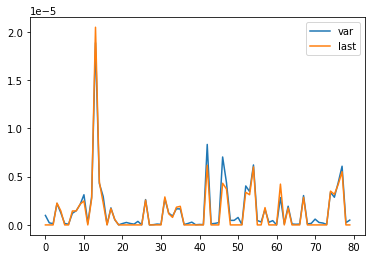

In [99]:
metric = 'rmse'
gropuby = 'train_multiplier'

target = 'chainlink_usdc_eth'
train_multiplier = [0.25, 0.5, 1, 2, 3, 4]
test_multiplier = [0.25, 0.5, 0.75, 1, 2, 3, 4]

train_multiplier = [0.1, 0.25, 0.5, 1, 2]
test_multiplier = [0.05, 0.1, 0.2, 0.5]
train_multiplier = [0.1, 0.25, 0.5, 1, 2]
test_multiplier = [0.05, 0.1, 0.2, 0.5]
result_dict = {}
var_aggregated_accuracy = {}
for i in tqdm.tqdm(train_multiplier):
    for j in tqdm.tqdm(test_multiplier):
        train_block_num = int(6424 * i)# train
        step_ahead = int(6424*j) # test
        with open(f'../data/var_eval_{train_block_num}_{step_ahead}.pickle', 'rb') as handle:
            eval_result = pickle.load(handle)
        result_dict[f'{train_block_num}_{step_ahead}'] = eval_result        
        
        dict_list = []
        for k in eval_result.values:
            if k != 'IndexError' and k != 'np.LinAlgError':
                dict_list.append(json.loads(k))
        current_mean = np.mean([q[target][metric] for q in dict_list])
        if current_mean < 100:
            var_aggregated_accuracy[f"{int(i*6424)},{int(j*6424)}"] = [q[target][metric] for q in dict_list]
# var_aggregated_accuracy = pd.DataFrame(var_aggregated_accuracy, columns=['train_multiplier', 'test_multiplier', 'accuracy'])

result_dict = {}
last_aggregated_accuracy = {}
for i in tqdm.tqdm(train_multiplier):
    for j in tqdm.tqdm(test_multiplier):
        train_block_num = int(6424 * i)# train
        step_ahead = int(6424*j) # test
        with open(f'../data/last_eval_{train_block_num}_{step_ahead}.pickle', 'rb') as handle:
            eval_result = pickle.load(handle)
        result_dict[f'{train_block_num}_{step_ahead}'] = eval_result        
        
        dict_list = []
        for k in eval_result.values:
            if k != 'IndexError' and k != 'np.LinAlgError':
                dict_list.append(json.loads(k))
        current_mean = np.mean([q[target][metric] for q in dict_list])
        if current_mean < 100:
            last_aggregated_accuracy[f"{int(i*6424)},{int(j*6424)}"] = [q[target][metric] for q in dict_list]
# last_aggregated_accuracy = pd.DataFrame(last_aggregated_accuracy, columns=['train_multiplier', 'test_multiplier', 'accuracy'])

print(var_aggregated_accuracy.keys())

key = '6424,321'

ttt = pd.DataFrame([var_aggregated_accuracy[key], last_aggregated_accuracy[key]]).T
ttt.columns = ['var', 'last']
ttt.plot()
print((ttt['last']-ttt['var']).mean())
ttt

100%|██████████| 5/5 [00:00<00:00,  7.31it/s]


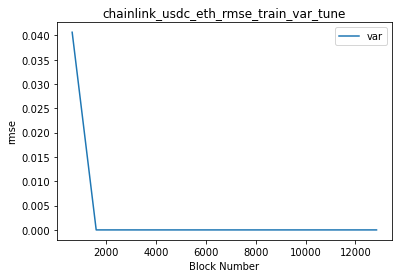

In [62]:
metric = 'rmse'
gropuby = 'train_multiplier'

target = 'chainlink_usdc_eth'
train_multiplier = [0.25, 0.5, 1, 2, 3, 4]
test_multiplier = [0.25, 0.5, 0.75, 1, 2, 3, 4]

train_multiplier = [0.1, 0.25, 0.5, 1, 2]
test_multiplier = [0.05, 0.1, 0.2, 0.5]
train_multiplier = [0.1, 0.25, 0.5, 1, 2]
test_multiplier = [0.05, 0.1, 0.2, 0.5]

result_dict = {}
var_aggregated_accuracy = []
for i in tqdm.tqdm(train_multiplier):
    for j in tqdm.tqdm(test_multiplier):
        train_block_num = int(6424 * i)# train
        step_ahead = int(6424*j) # test
        with open(f'../data/var_eval_{train_block_num}_{step_ahead}.pickle', 'rb') as handle:
            eval_result = pickle.load(handle)
        result_dict[f'{train_block_num}_{step_ahead}'] = eval_result        
        
        dict_list = []
        for k in eval_result.values:
            if k != 'IndexError' and k != 'np.LinAlgError':
                dict_list.append(json.loads(k))
        current_mean = np.mean([q[target][metric] for q in dict_list])
        if current_mean < 100:
            var_aggregated_accuracy.append([i*6424,j*6424,np.mean([q[target][metric] for q in dict_list])])
var_aggregated_accuracy = pd.DataFrame(var_aggregated_accuracy, columns=['train_multiplier', 'test_multiplier', 'accuracy'])

result_dict = {}
ar_aggregated_accuracy = []
for i in tqdm.tqdm(train_multiplier):
    for j in tqdm.tqdm(test_multiplier):
        train_block_num = int(6424 * i)# train
        step_ahead = int(6424*j) # test
        with open(f'../data/ar_eval_{train_block_num}_{step_ahead}.pickle', 'rb') as handle:
            eval_result = pickle.load(handle)
        result_dict[f'{train_block_num}_{step_ahead}'] = eval_result        
        
        dict_list = []
        for k in eval_result.values:
            if k != 'IndexError' and k != 'np.LinAlgError':
                dict_list.append(json.loads(k))
        current_mean = np.mean([q[target][metric] for q in dict_list])
        if current_mean < 100:
            ar_aggregated_accuracy.append([i*6424,j*6424,np.mean([q[target][metric] for q in dict_list])])
ar_aggregated_accuracy = pd.DataFrame(ar_aggregated_accuracy, columns=['train_multiplier', 'test_multiplier', 'accuracy'])

result_dict = {}
mean_aggregated_accuracy = []
for i in tqdm.tqdm(train_multiplier):
    for j in tqdm.tqdm(test_multiplier):
        train_block_num = int(6424 * i)# train
        step_ahead = int(6424*j) # test
        with open(f'../data/mean_eval_{train_block_num}_{step_ahead}.pickle', 'rb') as handle:
            eval_result = pickle.load(handle)
        result_dict[f'{train_block_num}_{step_ahead}'] = eval_result        
        
        dict_list = []
        for k in eval_result.values:
            if k != 'IndexError' and k != 'np.LinAlgError':
                dict_list.append(json.loads(k))
        current_mean = np.mean([q[target][metric] for q in dict_list])
        if current_mean < 100:
            mean_aggregated_accuracy.append([i*6424,j*6424,np.mean([q[target][metric] for q in dict_list])])
mean_aggregated_accuracy = pd.DataFrame(mean_aggregated_accuracy, columns=['train_multiplier', 'test_multiplier', 'accuracy'])

result_dict = {}
last_aggregated_accuracy = []
for i in tqdm.tqdm(train_multiplier):
    for j in tqdm.tqdm(test_multiplier):
        train_block_num = int(6424 * i)# train
        step_ahead = int(6424*j) # test
        with open(f'../data/last_eval_{train_block_num}_{step_ahead}.pickle', 'rb') as handle:
            eval_result = pickle.load(handle)
        result_dict[f'{train_block_num}_{step_ahead}'] = eval_result        
        
        dict_list = []
        for k in eval_result.values:
            if k != 'IndexError' and k != 'np.LinAlgError':
                dict_list.append(json.loads(k))
        current_mean = np.mean([q[target][metric] for q in dict_list])
        if current_mean < 100:
            last_aggregated_accuracy.append([i*6424,j*6424,np.mean([q[target][metric] for q in dict_list])])
last_aggregated_accuracy = pd.DataFrame(last_aggregated_accuracy, columns=['train_multiplier', 'test_multiplier', 'accuracy'])

var_data = var_aggregated_accuracy.groupby(gropuby)['accuracy'].mean()
var_data.name = 'var'
ar_data = ar_aggregated_accuracy.groupby(gropuby)['accuracy'].mean()
ar_data.name = 'ar'
mean_data = mean_aggregated_accuracy.groupby(gropuby)['accuracy'].mean()
mean_data.name = 'mean'
last_data = last_aggregated_accuracy.groupby(gropuby)['accuracy'].mean()
last_data.name = 'last'

ax = var_data.plot()
ar_data.plot(ax = ax)
mean_data.plot(ax = ax)
last_data.plot(ax = ax)
ax.legend()
ax.set_xlabel("Block Number")
ax.set_title(f"{target}_{metric}_{gropuby.split('_')[0]}_var_tune")
ax.set_ylabel(metric)
ax.get_figure().savefig(f"./{target}_{metric}_{gropuby.split('_')[0]}_var_tune.pdf")

In [59]:
var_aggregated_accuracy

,train_multiplier,test_multiplier,accuracy
0,642.4,321.2,0.000007
1,642.4,642.4,0.000004
2,642.4,1284.8,0.162530
3,642.4,3212.0,0.000019
4,1606.0,321.2,0.000001
5,1606.0,642.4,0.000003
6,1606.0,1284.8,0.000004
7,1606.0,3212.0,0.000008
8,3212.0,321.2,0.000001
9,3212.0,642.4,0.000002


100%|██████████| 4/4 [00:00<00:00, 215.65it/s]


test_multiplier
321.2     0.003076
642.4     0.004404
1284.8    0.007859
3212.0    0.014534
Name: var, dtype: float64
test_multiplier
321.2     0.002563
642.4     0.003932
1284.8    0.007104
3212.0    0.012768
Name: last, dtype: float64


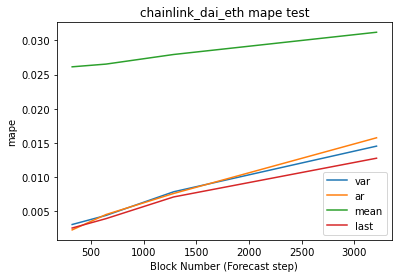

In [136]:
metric = 'mape'
gropuby = 'test_multiplier'

target = 'chainlink_dai_eth'
train_multiplier = [0.25, 0.5, 1]#, 2, 3, 4]
test_multiplier = [0.01, 0.05, 0.1, 0.25]#, 0.25, 0.5, 0.75, 1]
test_multiplier = [0.005, 0.01, 0.05, 0.1]
test_multiplier = [0.005, 0.05, 0.1]

train_multiplier = [1]
test_multiplier = [0.005, 0.05, 0.1]

train_multiplier = [0.1, 0.25, 0.5, 1, 2]
test_multiplier = [0.05, 0.1, 0.2, 0.5]


train_multiplier = [0.1, 0.25, 0.5, 1, 2]
# test_multiplier = [0.01, 0.015, 0.02, 0.025]


train_block_num = int(6424*2)

result_dict = {}
var_aggregated_accuracy = []
# for i in tqdm.tqdm(train_multiplier):
for j in tqdm.tqdm(test_multiplier):
    # train_block_num = int(6424 * i)# train
    step_ahead = int(6424*j) # test
    with open(f'../data/var_eval_{train_block_num}_{step_ahead}.pickle', 'rb') as handle:
        eval_result = pickle.load(handle)
    result_dict[f'{train_block_num}_{step_ahead}'] = eval_result        
    
    dict_list = []
    for k in eval_result.values:
        if k != 'IndexError' and k != 'np.LinAlgError':
            dict_list.append(json.loads(k))
    current_mean = np.mean([q[target][metric] for q in dict_list])
    # if current_mean < 100:
    var_aggregated_accuracy.append([i*6424,j*6424,np.mean([q[target][metric] for q in dict_list])])
var_aggregated_accuracy = pd.DataFrame(var_aggregated_accuracy, columns=['train_multiplier', 'test_multiplier', 'accuracy'])

# result_dict = {}
# ar_aggregated_accuracy = []
# # for i in tqdm.tqdm(train_multiplier):
# for j in tqdm.tqdm(test_multiplier):
#     # train_block_num = int(6424 * i)# train
#     step_ahead = int(6424*j) # test
#     with open(f'../data/ar_eval_{train_block_num}_{step_ahead}.pickle', 'rb') as handle:
#         eval_result = pickle.load(handle)
#     result_dict[f'{train_block_num}_{step_ahead}'] = eval_result        

#     dict_list = []
#     for k in eval_result.values:
#         if k != 'IndexError' and k != 'np.LinAlgError':
#             dict_list.append(json.loads(k))
#     current_mean = np.mean([q[target][metric] for q in dict_list])
#     # if current_mean < 100:
#     ar_aggregated_accuracy.append([i*6424,j*6424,np.mean([q[target][metric] for q in dict_list])])
# ar_aggregated_accuracy = pd.DataFrame(ar_aggregated_accuracy, columns=['train_multiplier', 'test_multiplier', 'accuracy'])

result_dict = {}
mean_aggregated_accuracy = []
# for i in tqdm.tqdm(train_multiplier):
for j in tqdm.tqdm(test_multiplier):
    # train_block_num = int(6424 * i)# train
    step_ahead = int(6424*j) # test
    with open(f'../data/mean_eval_{train_block_num}_{step_ahead}.pickle', 'rb') as handle:
        eval_result = pickle.load(handle)
    result_dict[f'{train_block_num}_{step_ahead}'] = eval_result        
    
    dict_list = []
    for k in eval_result.values:
        if k != 'IndexError' and k != 'np.LinAlgError':
            dict_list.append(json.loads(k))
    current_mean = np.mean([q[target][metric] for q in dict_list])
    # if current_mean < 100:
    mean_aggregated_accuracy.append([i*6424,j*6424,np.mean([q[target][metric] for q in dict_list])])
mean_aggregated_accuracy = pd.DataFrame(mean_aggregated_accuracy, columns=['train_multiplier', 'test_multiplier', 'accuracy'])

result_dict = {}
last_aggregated_accuracy = []
# for i in tqdm.tqdm(train_multiplier):
for j in tqdm.tqdm(test_multiplier):
    # train_block_num = int(6424 * i)# train
    step_ahead = int(6424*j) # test
    with open(f'../data/last_eval_{train_block_num}_{step_ahead}.pickle', 'rb') as handle:
        eval_result = pickle.load(handle)
    result_dict[f'{train_block_num}_{step_ahead}'] = eval_result        
    
    dict_list = []
    for k in eval_result.values:
        if k != 'IndexError' and k != 'np.LinAlgError':
            dict_list.append(json.loads(k))
    current_mean = np.mean([q[target][metric] for q in dict_list])
    # if current_mean < 100:
    last_aggregated_accuracy.append([i*6424,j*6424,np.mean([q[target][metric] for q in dict_list])])
last_aggregated_accuracy = pd.DataFrame(last_aggregated_accuracy, columns=['train_multiplier', 'test_multiplier', 'accuracy'])


var_aggregated_accuracy
# ar_aggregated_accuracy
mean_aggregated_accuracy
last_aggregated_accuracy

var_data = var_aggregated_accuracy.groupby(gropuby)['accuracy'].mean()
var_data.name = 'var'
# ar_data = ar_aggregated_accuracy.groupby(gropuby)['accuracy'].mean()
# ar_data.name = 'ar'
mean_data = mean_aggregated_accuracy.groupby(gropuby)['accuracy'].mean()
mean_data.name = 'mean'
last_data = last_aggregated_accuracy.groupby(gropuby)['accuracy'].mean()
last_data.name = 'last'
print(var_data)
print(last_data)
ax = var_data.plot()
ar_data.plot(ax = ax)
mean_data.plot(ax = ax)
last_data.plot(ax = ax)
ax.legend()
ax.set_xlabel("Block Number (Forecast step)")

ax.set_ylabel(metric)
ax.set_title(f"{target} {metric} {gropuby.split('_')[0]}")
ax.get_figure().savefig(f"./{target}_{metric}_{gropuby.split('_')[0]}_{train_block_num}_var_vs_ar_vs_mean_vs_last.pdf")

In [83]:
var_aggregated_accuracy

,train_multiplier,test_multiplier,accuracy
0,12848,321.2,0.002439
1,12848,642.4,0.004794
2,12848,1284.8,0.007615
3,12848,3212.0,0.016583


In [38]:
def invert_transformation(df_train, df_forecast):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 1st Diff
        df_fc[str(col)] = (df_train[col].iloc[-1] + df_fc[col].cumsum()) # np.exp(df_train[col].iloc[-1] + df_fc[col].cumsum())
    return df_fc

def reverse_tokens(df_row):
    token0 = df_row['token0']
    token1 = df_row['token1']
    current = df_row['current']
    df_row['token0'] = token1
    df_row['token1'] = token0
    df_row['current'] = 1.0/current
    return df_row


# Reference https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse,})# 'corr':corr, 'minmax':minmax})

def var_train_n_evaluate(train_data, test_data, model=None):
    try:

        train_data_diff = train_data.diff().dropna().reset_index(drop=True)
        if model == None:
            model = get_var_result(train_data_diff, maxlags=None)
        lag_order = model.k_ar
        forecast_input = train_data_diff.values[-lag_order:]
        price_diff_prediction = pd.DataFrame(
            model.forecast(y=forecast_input, steps=test_data.shape[0]),
            columns=train_data_diff.columns
        )
        # print(price_diff_prediction.shape)

        price_prediction = invert_transformation(train_data, price_diff_prediction) 
        result_dict = {}
        for i, j in zip(train_data.columns, test_data.columns):
            assert i == j, 'ERROR, name mismatch'
            # print(price_prediction[i].shape, test_data[j].shape)
            result_dict[i] = forecast_accuracy(
                price_prediction[i].values, 
                test_data[j].values
            )

        return json.dumps(result_dict)
    except IndexError:
        return 'IndexError'
    except np.linalg.LinAlgError:
        return 'np.LinAlgError'

def mean_train_n_evaluate(train_data, test_data):
    try:
        # train_data_diff = train_data.diff().dropna().reset_index(drop=True)
        # model = get_var_result(train_data_diff, maxlags=None)
        # lag_order = model.k_ar
        # forecast_input = train_data_diff.values[-lag_order:]
        # price_diff_prediction = pd.DataFrame(
        #     model.forecast(y=forecast_input, steps=test_data.shape[0]),
        #     columns=train_data_diff.columns
        # )
        # print(price_diff_prediction.shape)

        price_prediction = test_data.copy()
        for i in train_data.columns:
            price_prediction[i] = train_data[i].mean()
        result_dict = {}
        for i, j in zip(train_data.columns, test_data.columns):
            assert i == j, 'ERROR, name mismatch'
            # print(price_prediction[i].shape, test_data[j].shape)
            result_dict[i] = forecast_accuracy(
                price_prediction[i].values, 
                test_data[j].values
            )

        return json.dumps(result_dict)
    except IndexError:
        return 'IndexError'
    except np.linalg.LinAlgError:
        return 'np.LinAlgError'

def last_train_n_evaluate(train_data, test_data):
    try:
        price_prediction = test_data.copy()
        for i in train_data.columns:
            price_prediction[i] = train_data[i].iloc[-1]
        result_dict = {}
        for i, j in zip(train_data.columns, test_data.columns):
            assert i == j, 'ERROR, name mismatch'
            # print(price_prediction[i].shape, test_data[j].shape)
            result_dict[i] = forecast_accuracy(
                price_prediction[i].values, 
                test_data[j].values
            )

        return json.dumps(result_dict)
    except IndexError:
        return 'IndexError'
    except np.linalg.LinAlgError:
        return 'np.LinAlgError'

# def ar_train_n_evaluate(train_data, test_data, model=None):
#     try:
#         train_data_diff = train_data.diff().dropna().reset_index(drop=True)
#         predict_list = []
#         for i in train_data_diff.columns:

#             model = get_ar_result(train_data_diff[i], maxlags=50)
#             # lag_order = model.k_ar
#             # forecast_input = train_data_diff.values[-lag_order:]
#             predict_list.append(model.forecast(steps=test_data.shape[0]))

#         price_diff_prediction = pd.concat(
#             predict_list,
#             axis=1
#         )
#         price_diff_prediction.columns = train_data_diff.columns
#         # print(price_diff_prediction.shape)

#         price_prediction = invert_transformation(test_data, price_diff_prediction) 
#         result_dict = {}
#         for i, j in zip(train_data.columns, test_data.columns):
#             assert i == j, 'ERROR, name mismatch'
#             # print(price_prediction[i].shape, test_data[j].shape)
#             result_dict[i] = forecast_accuracy(
#                 price_prediction[i].values, 
#                 test_data[j].values
#             )

#         return json.dumps(result_dict)
#     except IndexError:
#         print('IndexError')
#         return 'IndexError'
#     except np.linalg.LinAlgError:
#         print('np.LinAlgError')
#         return 'np.LinAlgError'

# def vecm_train_n_evaluate(train_data, test_data):
#     try:
#         train_data_diff = train_data.diff().dropna().reset_index(drop=True)
#         model = get_vecm_result(train_data_diff, maxlags=50)
#         lag_order = model.k_ar
#         forecast_input = train_data_diff.values[-lag_order:]
#         price_diff_prediction = pd.DataFrame(
#             model.predict(steps=test_data.shape[0]),
#             columns=train_data_diff.columns
#         )
#         # print(price_diff_prediction.shape)

#         price_prediction = invert_transformation(test_data, price_diff_prediction) 
#         result_dict = {}
#         for i, j in zip(train_data.columns, test_data.columns):
#             assert i == j, 'ERROR, name mismatch'
#             # print(price_prediction[i].shape, test_data[j].shape)
#             result_dict[i] = forecast_accuracy(
#                 price_prediction[i].values, 
#                 test_data[j].values
#             )

#         return json.dumps(result_dict)
#     except IndexError:
#         print('IndexError')
#         return 'IndexError'
#     except np.linalg.LinAlgError:
#         print('np.LinAlgError')
#         return 'np.LinAlgError'
    
def main(df, train_block_num, step_ahead, model='var'):

    main_result_dict = defaultdict(lambda:defaultdict(list))

    train_from_list = []
    train_to_list = []
    test_from_list = []
    test_to_list = []

    split_num = 80
    select_range = df.shape[0] - (step_ahead+train_block_num)
    select_gap = select_range // split_num
    for i in range(split_num):
        train_from_list.append(i*select_gap)
        train_to_list.append(i*select_gap + train_block_num)
        test_from_list.append(i*select_gap + train_block_num)
        test_to_list.append(i*select_gap + train_block_num + step_ahead)


    # split_num = df.shape[0] // (step_ahead+train_block_num)
    # for i in range(split_num):
    #     train_from_list.append(i*(step_ahead+train_block_num))
    #     train_to_list.append(i*(step_ahead+train_block_num)+train_block_num)
    #     test_from_list.append(i*(step_ahead+train_block_num)+train_block_num)
    #     test_to_list.append(i*(step_ahead+train_block_num)+step_ahead+train_block_num)
    # for i in tqdm.tqdm(range(train_block_num, df.shape[0]-step_ahead)):
    #     # train_data = df.iloc[i-train_block_num:i]
    #     # test_data = df.iloc[i:i+step_ahead]
    #     train_data_from = i-train_block_num
    #     train_data_to = i
    #     test_data_from = i
    #     test_data_to = i+step_ahead
    #     train_from_list.append(train_data_from)
    #     train_to_list.append(train_data_to)
    #     test_from_list.append(test_data_from)
    #     test_to_list.append(test_data_to)

    split_df = pd.DataFrame([train_from_list, train_to_list, test_from_list, test_to_list]).T
    split_df.columns = ['train_from', 'train_to', 'test_from', 'test_to']

    def inner_main(split_df_row):
        train_data = df.iloc[split_df_row['train_from']:split_df_row['train_to']].copy()
        del train_data['block_num']
        test_data = df.iloc[split_df_row['test_from']:split_df_row['test_to']].copy()
        del test_data['block_num']
        
            
        # if model == 'vecm':
        #     return vecm_train_n_evaluate(train_data, test_data)
        # if model == 'ar':
        #     return ar_train_n_evaluate(train_data, test_data)
        if model == 'mean':
            return mean_train_n_evaluate(train_data, test_data)
        if model == 'last':
            return last_train_n_evaluate(train_data, test_data)
        # if model == 'var'
        return var_train_n_evaluate(train_data, test_data)
    
    # for index in split_df.index:
    #     inner_main(split_df.loc[index])

    return split_df.parallel_apply(inner_main, axis=1)

In [ ]:
flat_df = pd.read_csv('../data/dataflat_df3.csv')

In [39]:
train_len = 6424
i = 6424 * 5
test_len = 0.5
train_data = flat_df.iloc[i:(i+train_len),:]
test_data = flat_df.iloc[(i+train_len):(i + train_len + int(6424*test_len)),:]

del train_data['block_num']
del test_data['block_num']

print(json.loads(last_train_n_evaluate(train_data, test_data))['chainlink_usdc_eth'])
print(json.loads(mean_train_n_evaluate(train_data, test_data))['chainlink_usdc_eth'])
print(json.loads(var_train_n_evaluate(train_data, test_data))['chainlink_usdc_eth'])
# print(json.loads(ar_train_n_evaluate(train_data, test_data, maxlags=1))['chainlink_usdc_eth'])

{'mape': 0.015921078325572963, 'me': 4.8421912924174485e-06, 'mae': 4.8421912924174485e-06, 'mpe': 0.015921078325572963, 'rmse': 5.309959610767539e-06}
{'mape': 0.04136100627084348, 'me': 1.2604084499953062e-05, 'mae': 1.2604084499953062e-05, 'mpe': 0.04136100627084348, 'rmse': 1.279108285633301e-05}
{'mape': 0.0039591210712054, 'me': 6.814431187541127e-08, 'mae': 1.206151227614275e-06, 'mpe': 0.00022459705475151408, 'rmse': 1.4330620043117747e-06}


In [42]:
model.k_ar

11

In [41]:
model.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 25, Aug, 2022
Time:                     08:04:38
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                   -284.858
Nobs:                     6412.00    HQIC:                  -285.479
Log likelihood:           835315.    FPE:               7.50418e-125
AIC:                     -285.808    Det(Omega_mle):    6.52853e-125
--------------------------------------------------------------------
Results for equation uniswapv2_usdc_eth
                            coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------
const                         -0.000000         0.000000           -1.573           0.116
L1.uniswapv2_usdc_eth         -0.080658         0.013678           -5.897           0.000
L1.uniswapv

[0.00030996 0.00030985 0.00030984 ... 0.00030077 0.00030076 0.00030076]
0.0039591210712053996


,chainlink_usdc_eth,chainlink_usdc_eth
0,0.000310,0.000310
1,0.000310,0.000310
2,0.000310,0.000310
3,0.000310,0.000310
4,0.000310,0.000310
...,...,...
3207,0.000304,0.000301
3208,0.000304,0.000301
3209,0.000304,0.000301
3210,0.000304,0.000301


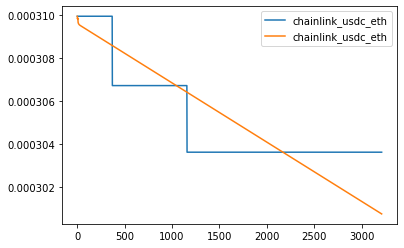

In [36]:
check = 'chainlink_usdc_eth'

train_data_diff = train_data.diff().dropna().reset_index(drop=True)
model = get_var_result(train_data_diff, maxlags=None)
lag_order = model.k_ar
forecast_input = train_data_diff.values[-lag_order:]
price_diff_prediction = pd.DataFrame(
    model.forecast(y=forecast_input, steps=test_data.shape[0]),
    columns=train_data_diff.columns
)
price_prediction = invert_transformation(train_data, price_diff_prediction) 


ttt = pd.concat([test_data[check].reset_index(drop=True), price_prediction[check].reset_index(drop=True)], axis=1)#.plot()
ttt.plot()
print(price_prediction[check].reset_index(drop=True).values)
print(np.mean(np.abs(ttt.iloc[:,0] - ttt.iloc[:,1])/ttt.iloc[:,0]))
# train_data[check].plot()
ttt

0.01592107832557356


,chainlink_usdc_eth,chainlink_usdc_eth
0,0.000310,0.00031
1,0.000310,0.00031
2,0.000310,0.00031
3,0.000310,0.00031
4,0.000310,0.00031
...,...,...
3207,0.000304,0.00031
3208,0.000304,0.00031
3209,0.000304,0.00031
3210,0.000304,0.00031


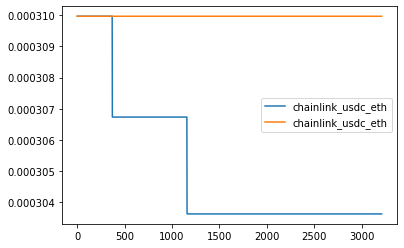

In [27]:
price_prediction = test_data.copy()
for i in train_data.columns:
    price_prediction[i] = train_data[i].iloc[-1]
result_dict = {}
ttt = pd.concat([test_data[check].reset_index(drop=True), price_prediction[check].reset_index(drop=True)], axis=1)#.plot()
ttt.plot()
# train_data[check].plot()
print(np.mean(np.abs(ttt.iloc[:,0] - ttt.iloc[:,1])/ttt.iloc[:,0]))
ttt

In [ ]:
# print(price_diff_prediction.shape)

price_prediction = invert_transformation(train_data, price_diff_prediction) 


ttt = pd.concat([test_data[check].reset_index(drop=True), price_prediction[check].reset_index(drop=True)], axis=1)#.plot()
ttt.plot()
# train_data[check].plot()
ttt

In [ ]:
price_prediction